## Notebook para generar las imagenes de persistencia, a partir de los diagramas que surgen del complejo de Rips

**Cargar librerias**

In [1]:
import ripser
from persim import plot_diagrams, PersistenceImager
import matplotlib.pyplot as plt
import gensim
import numpy as np
import pandas as pd

plt.rcParams.update(plt.rcParamsDefault) # reset default matplotlib parameters, este comando es opcional si no se muestran las figuras correctamente

**Cargar los datos**

In [6]:
gloVe_Embedding = np.load('datos/encuestav1_gloVe_Values.npy', allow_pickle=True)

### Prueba individual

d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


(100, 300)


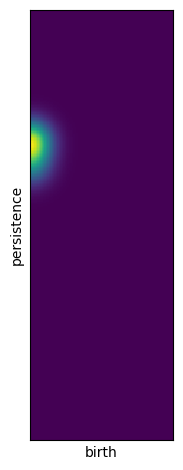

In [7]:
i= 2 # num de muestra 

ripserperiod = ripser.ripser(gloVe_Embedding[i])["dgms"]
h0_diagram = ripserperiod[0].copy()
h0_diagram = h0_diagram[np.isfinite(h0_diagram).all(axis=1)]
# Generate the images for all the persistence diagrams at once to assure the same pixel size
# Manually set birth and persistence ranges based on your data

#Los siguientes parámetros mantienen el tamaño de la imagen de persistencia (matriz)
birth_range = (0, 1)  
pers_range = (0, 3)   

# Initialize PersistenceImager
pimgr = PersistenceImager(pixel_size=0.01, birth_range=birth_range, pers_range=pers_range)
#pimgr = PersistenceImager(pixel_size=0.1)
pimgr.kernel_params = {'sigma': 0.01}
pdgms = h0_diagram#lista_vectores
#pimgr.fit(lista_vectores, skew=True)
pimgs = pimgr.transform(pdgms,skew=True)
pimgr.plot_image(pimgs)#, ax=axs[2])
print(pimgs.shape)
plt.tight_layout()
plt.show()

### Generar todas las imágenes

Generar primero diagrama de persistencia

In [8]:
lista_vectores = []
for i in range(len(gloVe_Embedding)):
    ripserperiod = ripser.ripser(gloVe_Embedding[i])["dgms"]
    h0_diagram = ripserperiod[0].copy()
    h0_diagram = h0_diagram[np.isfinite(h0_diagram).all(axis=1)]
    lista_vectores.append(h0_diagram)

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
d:\miniconda\envs\gcwtdaENV\lib\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than 

Generar imágenes

In [9]:
# Generate the images for all the persistence diagrams at once to assure the same pixel size
# Manually set birth and persistence ranges based on your data
birth_range = (0, 0.5)  # Adjust these values as per your data
pers_range = (0, 3)   # Adjust these values as per your data

# Initialize PersistenceImager
pimgr = PersistenceImager(pixel_size=0.01, birth_range=birth_range, pers_range=pers_range)
pimgr.kernel_params = {'sigma': 0.01}
pdgms = lista_vectores
#pimgr.fit(lista_vectores, skew=True)
pimgs = pimgr.transform(pdgms,skew=True)


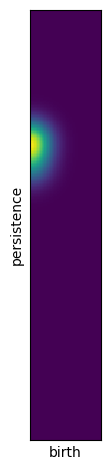

In [10]:
## Ejemplo

pimgr.plot_image(pimgs[2])#, ax=axs[2])

plt.tight_layout()
plt.show()

### Guardar imágenes

In [ ]:
np.save('datos/poll_imagv1.npy', pimgs)